In [37]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
house_data_original = pd.read_csv('california_housing_train.csv')
house_data_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
house_data_original.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
house_data_original["median_house_value"].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

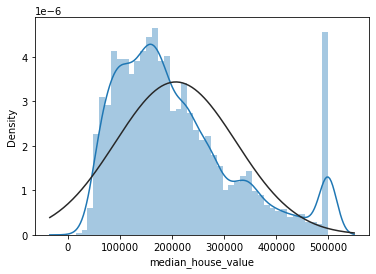

In [6]:
sns.distplot(house_data_original["median_house_value"], fit=norm)

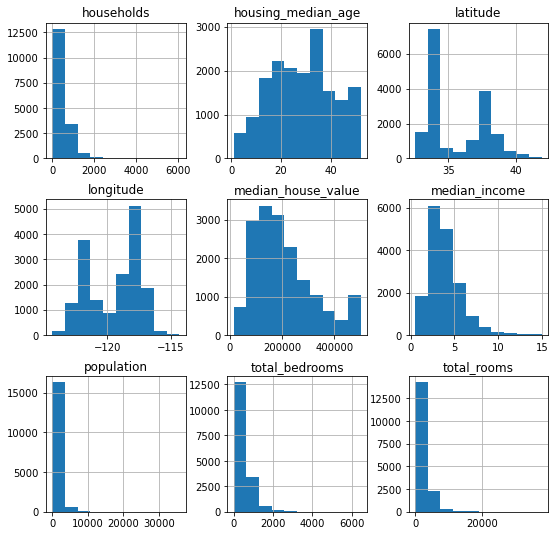

In [7]:
fig = house_data_original.hist(figsize = (9, 9))

# Матрица на корелација

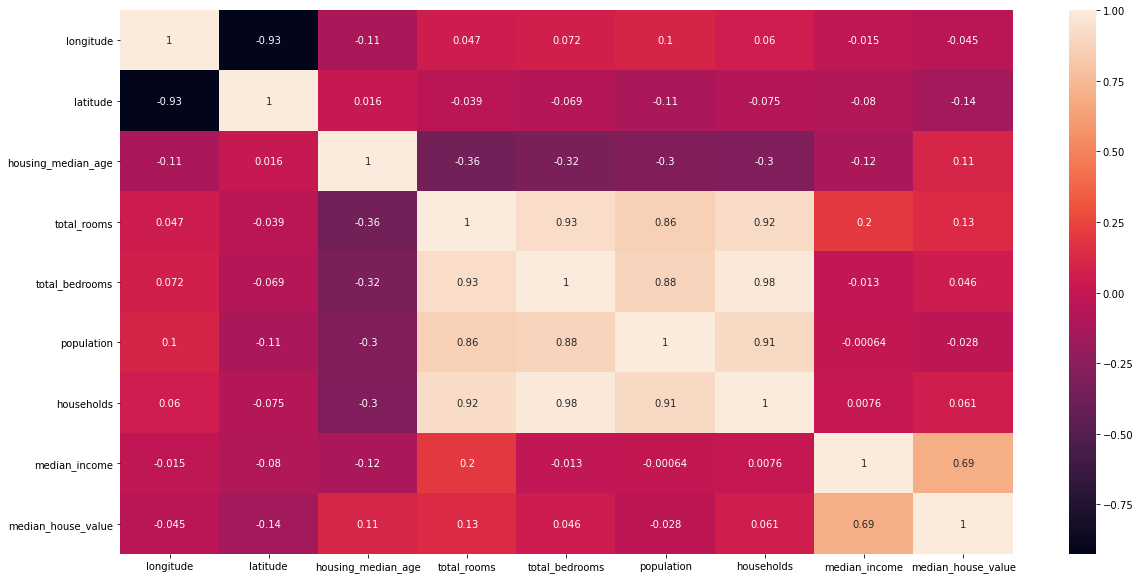

In [8]:
fig, ax = plt.subplots(figsize = (20, 10))
corr = house_data_original.corr()
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

Од матрицата на корелација јасно се воочува дека median_income има најголем коефициент за линеарна зависност со median_house_value. Атрибутите со најголем коефициент на корелација се longitude и latitude.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

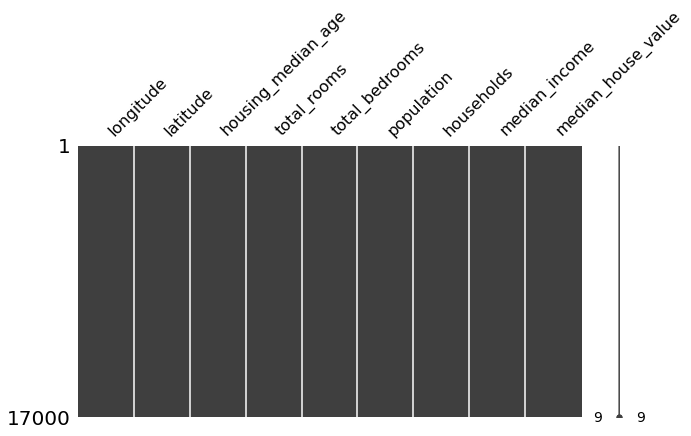

In [11]:
missingno.matrix(house_data_original, figsize=(10, 5))
house_data_original.isnull().sum()

Од missingno матрицата јасно се воочува дека нема празни елементи односно имаме комплетно множество.

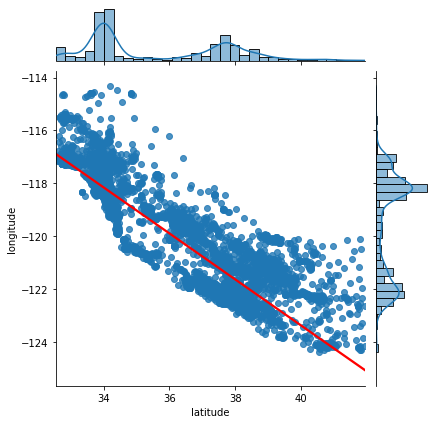

In [12]:
sns.jointplot(data=house_data_original, x="latitude", y="longitude", kind="reg", joint_kws={'line_kws':{'color':'red'}})

Овде чисто ја проверуваме линеарноста на двата елементи со најголем коефициент на корелација. Тоа се longitude и latitude (0.93)

# Feature and target jointplots

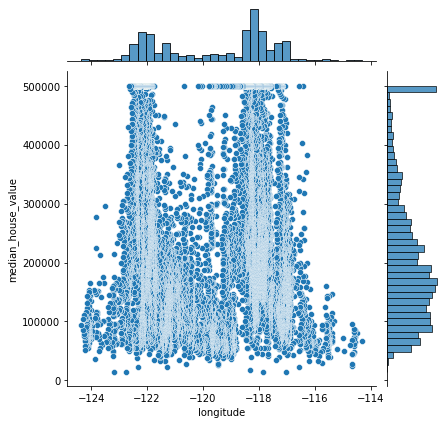

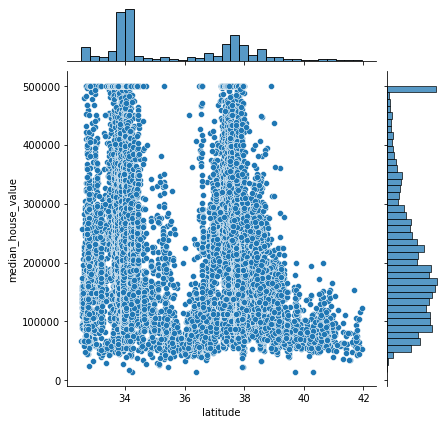

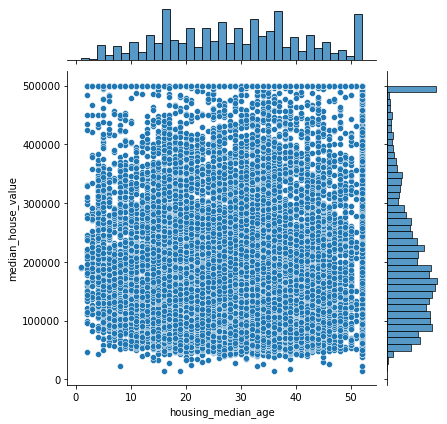

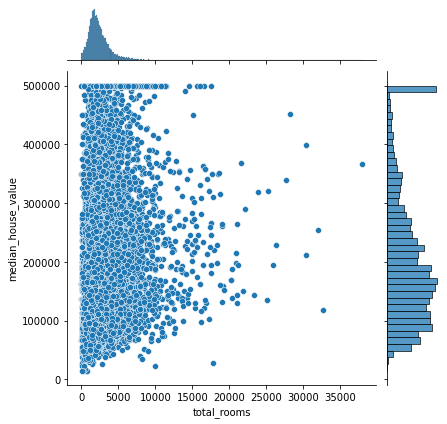

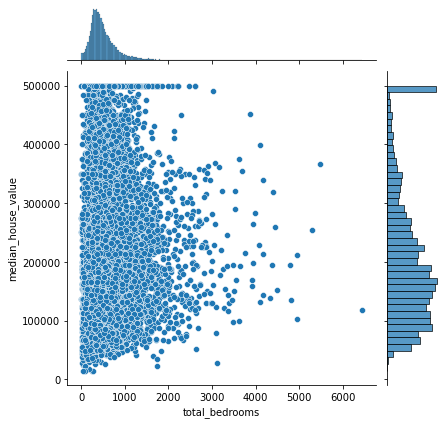

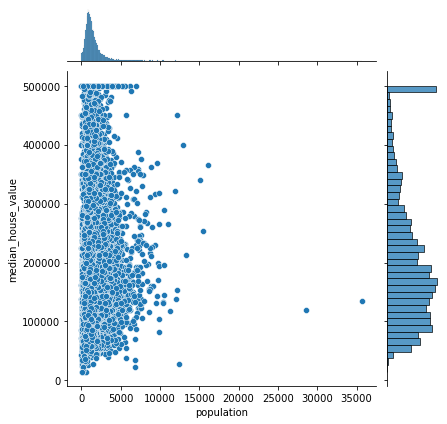

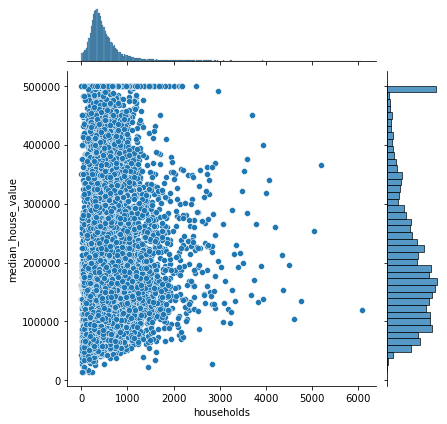

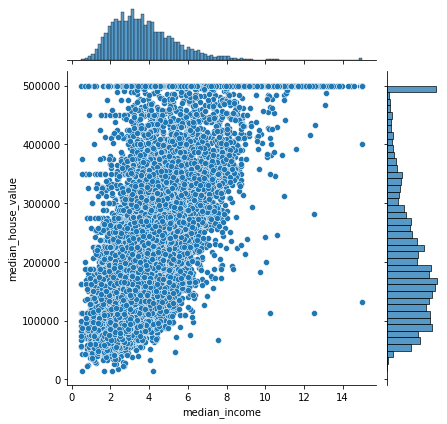

In [13]:
def jointplot():
    features = list(house_data_original.columns)[:-1]
    for feature in features:
        sns.jointplot(data=house_data_original, x=feature, y="median_house_value")
            
jointplot()

# Градење на регресија

### MinMax Scaler и делење на множеството на тренинг множество и тест множество


In [76]:
from sklearn.preprocessing import MinMaxScaler

x = house_data_original.drop('median_house_value', axis=1)
y = house_data_original.median_house_value

scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

house_data_scaled = pd.DataFrame(scaler.fit_transform(house_data_original), columns=house_data_original.columns)

x1 = house_data_scaled.drop('median_house_value', axis=1)
y1 = house_data_scaled.median_house_value

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [77]:
def mean_square_error(y_test, y_pred):
    args = []
    for i, j in zip(y_test, y_pred):
        args.append((i-round(j))**2)
    return sum(args) / len(y_test)

In [78]:
#Linearna regresija
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_train, y_train)}')
print(f'Intercept: {lr.intercept_}')

print('\n Skaliran MEDIAN HOUSE VALUE \n')

lr.fit(x1_train, y1_train)
y1_pred = lr.predict(x1_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x1_train, y1_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [ -432032.61307345  -402861.53315803    57445.78825124  -343217.74565123
   718794.45582471 -1193950.47400797   256476.08022021   582913.75454016]
Score: 0.636355383535472
Intercept: 368061.4962442692

 Skaliran MEDIAN HOUSE VALUE 

Coeficients: [-0.89078522 -0.83063891  0.11844444 -0.70766254  1.48204431 -2.4617434
  0.52881448  1.20187907]
Score: 0.636355383535472
Intercept: 0.7279609078813466


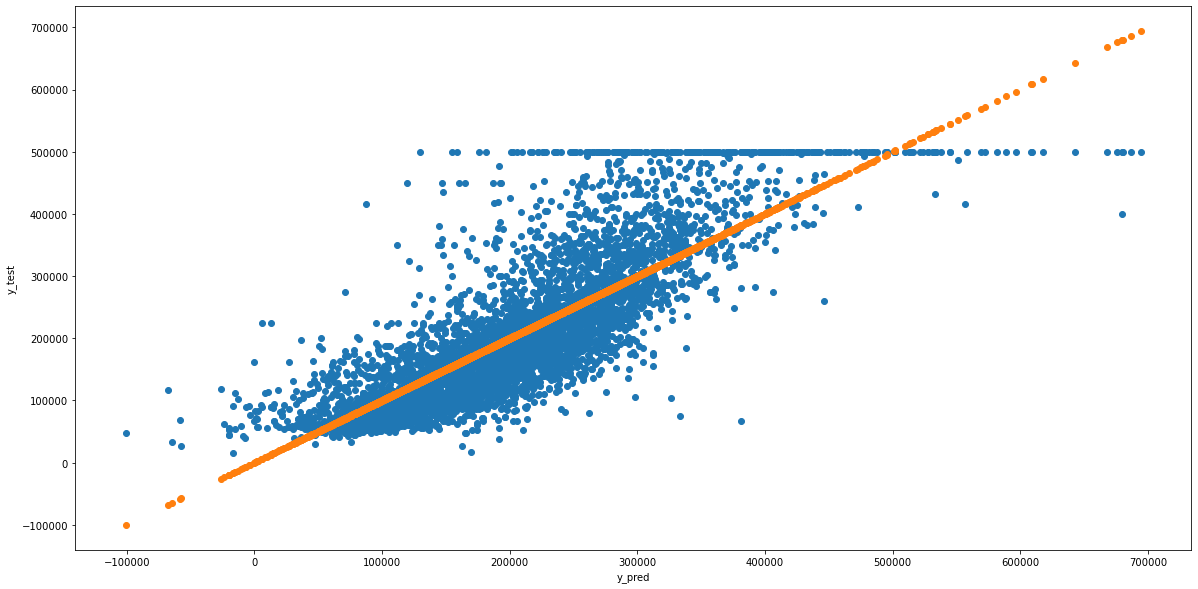

In [79]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_test)
plt.scatter(y_pred,y_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [80]:
print(sum(y_pred < 0)) #broj na negativni vrednosti (vkupno 24 vo nasiot slucaj)

24


Од анализата на регресијата можеме да воочиме дека регресијата нема баш добар fit со нашите податоци.

In [18]:
mean_square_error(y_test, y_pred)

4830763404.513922

In [19]:
mean_square_error(y_test, y_pred)**0.5 #RMSE ili rootMSE - ни покажува просечно колку ни е грешката. Во нашиот случај просечната грешка е околу 69503$

69503.6934595128

In [20]:
mean_squared_error(y_test, y_pred)

4830762847.990618

Воочуваме дека MSE е 4830762847. Првата грешка е рачно напишана функција додека пак другата е веќе готовата mean_squared_error. MSE има толку голема вредност поради самата природа на податоците. Понекогаш не е возможно да имаме мала вредност за МЅЕ а причината за тоа се вредностите на податоците.

In [21]:
mean_square_error(y1_test, y1_pred) #So skaliran median house income

0.1271084247564438

In [22]:
#Ridge regresija
lr = Ridge()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_train, y_train)}')
print(f'Intercept: {lr.intercept_}')

print('\n Skaliran MEDIAN HOUSE VALUE \n')

lr.fit(x1_train, y1_train)
y1_pred = lr.predict(x1_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x1_train, y1_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [-424191.44677587 -394917.61363887   58727.33593172 -238687.67718393
  528921.60798307 -847451.60105005  196754.91472713  571934.37724113]
Score: 0.6335515130092094
Intercept: 363166.54460862256

 Skaliran MEDIAN HOUSE VALUE 

Coeficients: [-0.87461793 -0.81425976  0.12108679 -0.49213751  1.09055552 -1.74731568
  0.40567856  1.17924128]
Score: 0.6335515130092094
Intercept: 0.7178682657156502


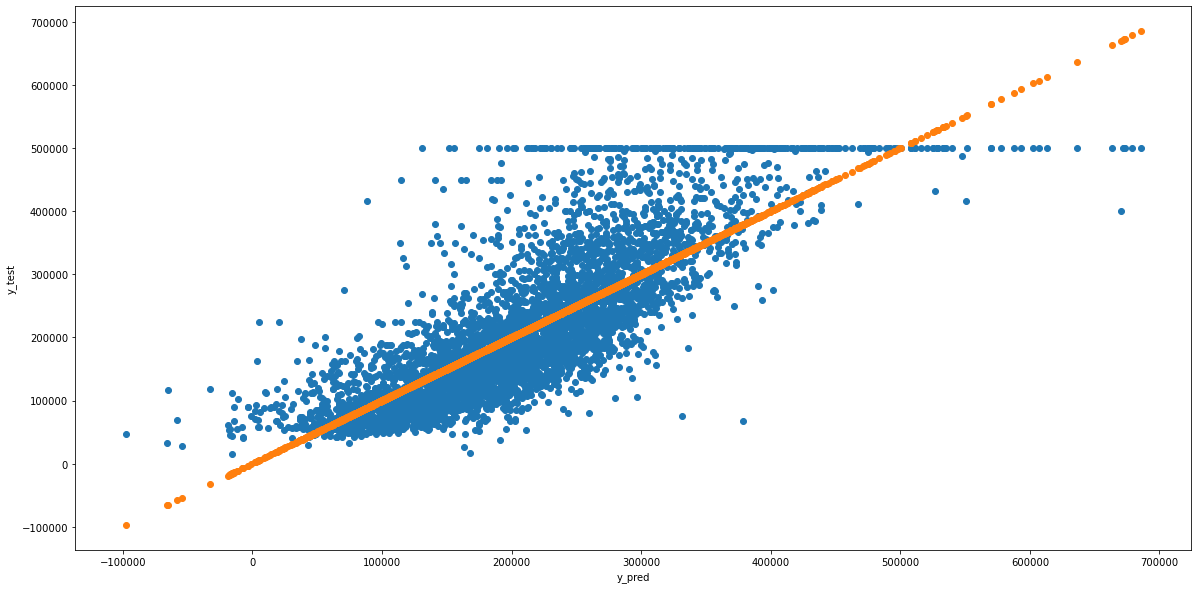

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_test)
plt.scatter(y_pred,y_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [24]:
mean_square_error(y_test, y_pred)

4945279254.3690195

Со Ridge воочуваме малку поголема MSE во однос на Linear 

In [25]:
mean_square_error(y_test, y_pred)**0.5 #RMSE ili rootMSE - ни покажува просечно колку ни е грешката. Во нашиот случај просечната грешка е околу 70332$

70322.6795164193

In [26]:
mean_square_error(y1_test, y1_pred) #So skaliran median house income

0.12931363417906921

In [27]:
#Lasso regresija
lr = Lasso()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_train, y_train)}')
print(f'Intercept: {lr.intercept_}')

print('\n Skaliran MEDIAN HOUSE VALUE \n')

lr.fit(x1_train, y1_train)
y1_pred = lr.predict(x1_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x1_train, y1_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [ -432047.23237296  -402883.90398846    57474.52763788  -338035.41003797
   715952.23758276 -1188293.96508875   252144.17350171   582421.41663469]
Score: 0.6363539893785004
Intercept: 368180.6747291454

 Skaliran MEDIAN HOUSE VALUE 

Coeficients: [-0. -0.  0.  0.  0. -0.  0.  0.]
Score: 0.0
Intercept: 0.39348415508569845


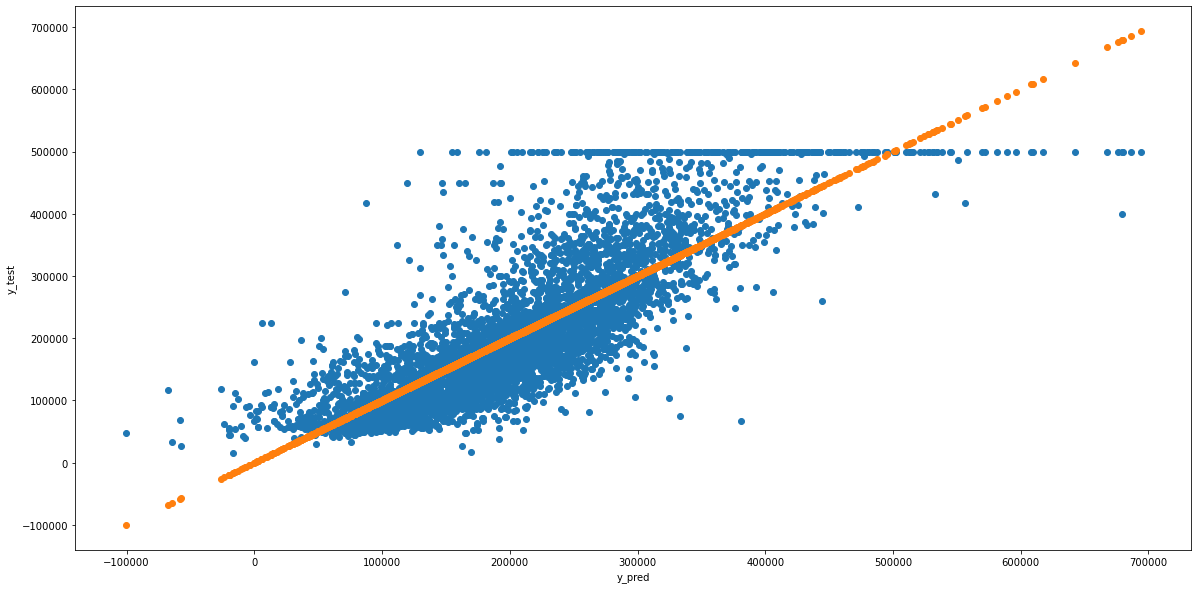

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_test)
plt.scatter(y_pred,y_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

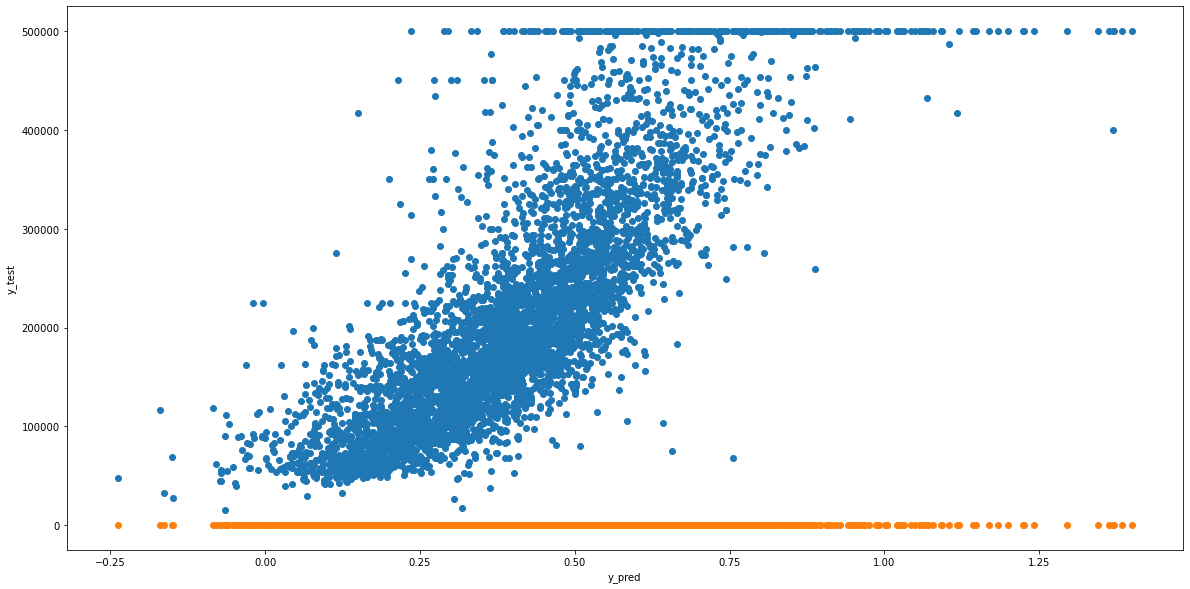

In [87]:
plt.figure(figsize=(20,10))
plt.scatter(y1_pred, y_test)
plt.scatter(y1_pred,y1_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

За Lasso регресијата со скалирани вредности, вклучувајќи и скалирана класа (цена за предвидување) забележуваме underfit односно правата на регресијата воопшто нема fit со вистинските вредности. Во овој случај сите коефициенти се 0 поради L1 penalty што Lasso го користи. [[1]](https://www.statisticshowto.com/regularization/#:~:text=L1%20regularization%20adds%20an%20L1,can%20become%20zero%20and%20eliminated.)

In [29]:
round(mean_square_error(y_test, y_pred))**0.5

69513.17849875662

In [30]:
mean_square_error(y_test, y_pred)**0.5 #RMSE ili rootMSE - ни покажува просечно колку ни е грешката. Во нашиот случај просечната грешка е околу 69513$

69513.17850112604

In [31]:
mean_square_error(y1_test, y1_pred) #So skaliran median house income

0.22154961202140852

Во предвидените резултати приметуваме и негативни вредности. Самата природа на линеарната регресија нема некои граници за тоа кои вредности треба да ги има поради линеарноста. Сепак, вредноста на класата (цената) не може да биде негативна затоа што немаме негативни цени. Причината за негативноста е поради лошиот fit на регресијата. За да го елиминираме проблемот на негативни вредности ќе ги логаритмираме вредностите на класата.

In [81]:
house_value_log = pd.DataFrame(np.log(house_data_original.median_house_value))
house_data = house_data_scaled.drop('median_house_value', axis=1)
house_data['median_house_value'] = house_value_log
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,11.110954
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,11.291031
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,11.358608
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,11.203679
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,11.089805


In [82]:
x_log = house_data.drop('median_house_value', axis=1)
y_log = house_data.median_house_value

In [83]:
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log, y_log, test_size = 0.3, random_state = 42)

In [84]:
#Linearna regresija
lr = LinearRegression()

lr.fit(x_log_train, y_log_train)
y_pred = lr.predict(x_log_test)
print(f'Coeficients: {lr.coef_}')
print(f'Score: {lr.score(x_log_train, y_log_train)}')
print(f'Intercept: {lr.intercept_}')

Coeficients: [-2.81124371 -2.67870508  0.15508862 -1.30373087  2.93731542 -5.61392753
  1.52986328  2.56832838]
Score: 0.6429875516717505
Intercept: 13.562440392633171


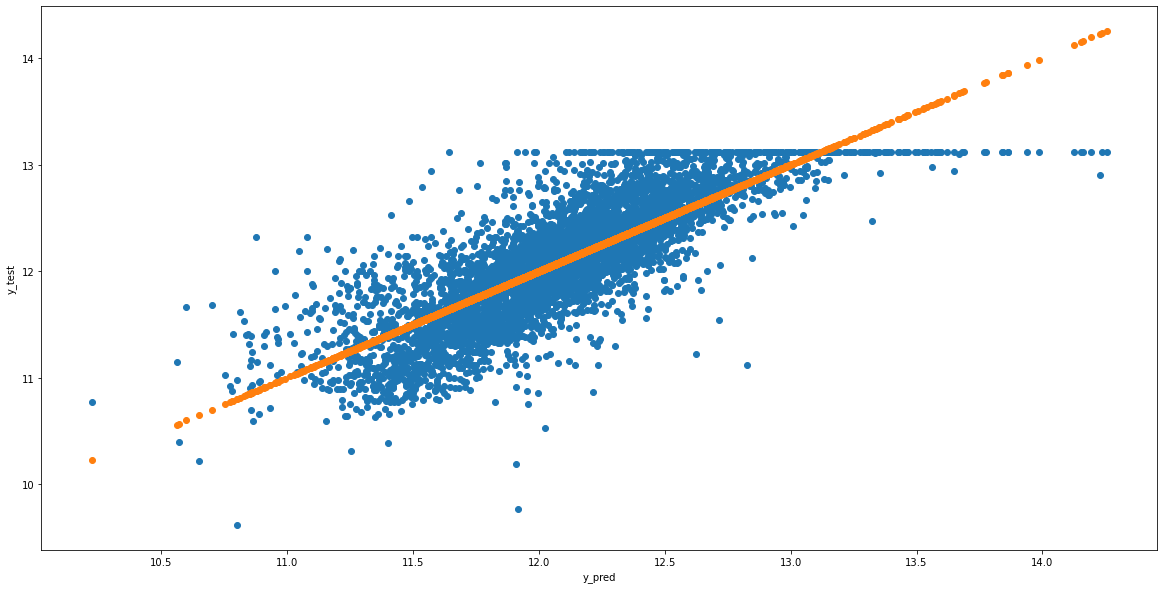

In [85]:
plt.figure(figsize=(20,10))
plt.scatter(y_pred, y_log_test)
plt.scatter(y_pred,y_pred)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [86]:
print(sum(y_pred < 0)) #broj na negativni vrednosti

0
